###  Business Hypothesis Testing to Find Employment Status versus Propensity for Term Deposits

#### 1

#### Hypothesis
High paying employees prefer term deposits than other categories of employees.

#### 2

In [1]:
# import required libraries
import pandas as pd
import altair as alt

#### 3

In [2]:
bankData = pd.read_csv('bank-data-set.csv', sep=";")
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
jobTot = bankData.groupby('job')['y'].agg(jobTot='count').reset_index()
jobTot.head()

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458


In [5]:
# Getting all the details in one place
jobProp = bankData.groupby(['job','y'])['y'].agg(jobCat='count').reset_index()
jobProp.head()

,job,y,jobCat
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364


#### 4

In [7]:
# Merging both data frames
jobComb = pd.merge(jobProp,jobTot,left_on=['job'], right_on=['job'])
jobComb['catProp'] = (jobComb.jobCat/jobComb.jobTot)*100
jobComb.head()

,job,y,jobCat,jobTot,catProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312


#### 5
Visualising data using matplotlib

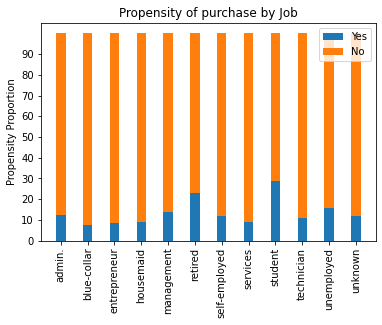

In [8]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np

# create separate data frames for yes and no:
jobcombYes = jobComb[jobComb['y'] == 'yes']
jobcombNo = jobComb[jobComb['y'] == 'no']

# Get the length of the x axis labels
xlabels = jobTot['job'].nunique()

# Get the proportion values
jobYes = jobcombYes['catProp'].unique()
jobNo = jobcombNo['catProp'].unique()

# Arrange the indexes of the x axis:
ind = np.arange(xlabels)

# Get width of each bar
width = 0.35

# Getting the plots
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom=jobYes)

# Getting the labels for the plots
plt.ylabel('Propensity Proportion')
plt.title('Propensity of purchase by Job')

# Defining the x label indexes and y label indexes
plt.xticks(ind, jobTot['job'].unique())
plt.yticks(np.arange(0, 100, 10))

# Defining the legends
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

# To rotate the axis labels
plt.xticks(rotation=90)
plt.show()